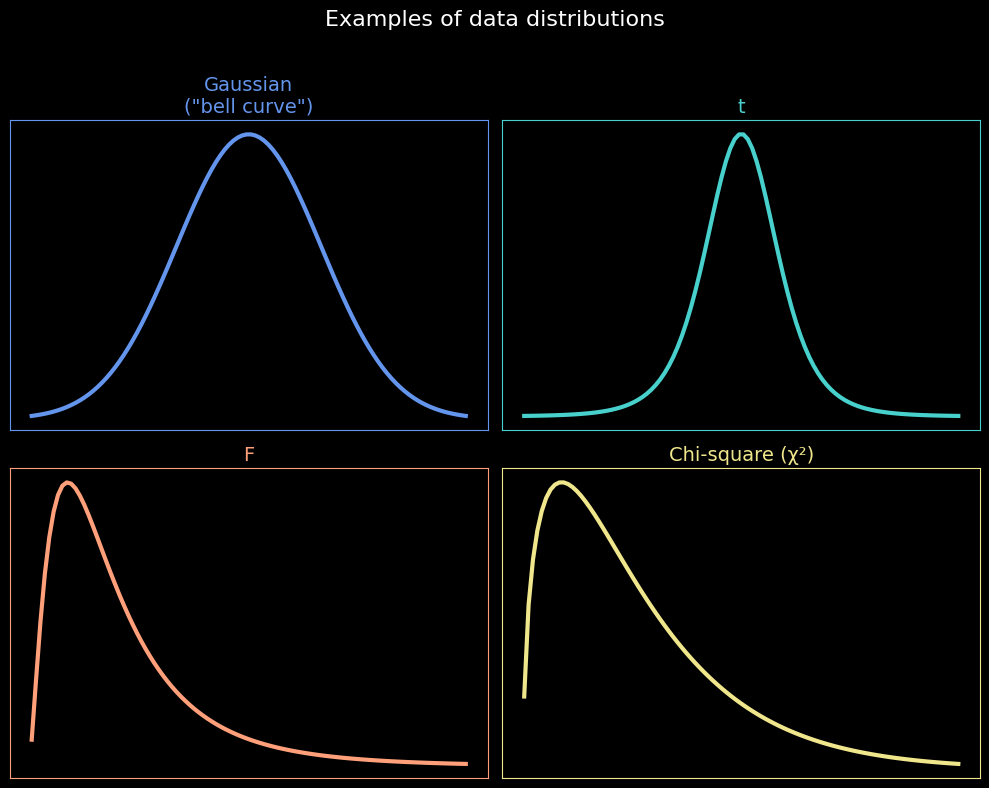

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 스타일 설정 (선택 사항)
plt.style.use('dark_background') # 이미지와 유사한 어두운 배경 사용
plt.rcParams['axes.edgecolor'] = 'gray'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['text.color'] = 'white'


# Figure 및 Subplots 생성 (2x2 그리드)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Examples of data distributions', fontsize=16, color='white')

# 1. 가우시안 (정규) 분포 ("bell curve")
mu_gaussian = 0  # 평균
sigma_gaussian = 1 # 표준편차
x_gaussian = np.linspace(mu_gaussian - 3*sigma_gaussian, mu_gaussian + 3*sigma_gaussian, 100)
y_gaussian = stats.norm.pdf(x_gaussian, mu_gaussian, sigma_gaussian)
axs[0, 0].plot(x_gaussian, y_gaussian, color='cornflowerblue', linewidth=3)
axs[0, 0].set_title('Gaussian\n("bell curve")', color='cornflowerblue', fontsize=14)
axs[0, 0].set_yticks([]) # y축 눈금 제거
axs[0, 0].set_xticks([]) # x축 눈금 제거
for spine in axs[0,0].spines.values(): # 축 선 색상
    spine.set_edgecolor('cornflowerblue')


# 2. t-분포
df_t = 5  # 자유도 (degrees of freedom) - 자유도에 따라 모양이 변합니다.
x_t = np.linspace(stats.t.ppf(0.001, df_t), stats.t.ppf(0.999, df_t), 100)
y_t = stats.t.pdf(x_t, df_t)
axs[0, 1].plot(x_t, y_t, color='mediumturquoise', linewidth=3)
axs[0, 1].set_title('t', color='mediumturquoise', fontsize=14)
axs[0, 1].set_yticks([])
axs[0, 1].set_xticks([])
for spine in axs[0,1].spines.values():
    spine.set_edgecolor('mediumturquoise')


# 3. F-분포
dfn_f = 5   # 분자의 자유도
dfd_f = 10  # 분모의 자유도
x_f = np.linspace(stats.f.ppf(0.001, dfn_f, dfd_f), stats.f.ppf(0.99, dfn_f, dfd_f), 100) # F분포는 0보다 큰 값만 가짐
y_f = stats.f.pdf(x_f, dfn_f, dfd_f)
axs[1, 0].plot(x_f, y_f, color='lightsalmon', linewidth=3)
axs[1, 0].set_title('F', color='lightsalmon', fontsize=14)
axs[1, 0].set_yticks([])
axs[1, 0].set_xticks([])
for spine in axs[1,0].spines.values():
    spine.set_edgecolor('lightsalmon')


# 4. 카이제곱 (χ²) 분포
df_chi2 = 3  # 자유도
x_chi2 = np.linspace(stats.chi2.ppf(0.001, df_chi2), stats.chi2.ppf(0.99, df_chi2), 100) # 카이제곱분포는 0보다 큰 값만 가짐
y_chi2 = stats.chi2.pdf(x_chi2, df_chi2)
axs[1, 1].plot(x_chi2, y_chi2, color='khaki', linewidth=3)
axs[1, 1].set_title('Chi-square (χ²)', color='khaki', fontsize=14)
axs[1, 1].set_yticks([])
axs[1, 1].set_xticks([])
for spine in axs[1,1].spines.values():
    spine.set_edgecolor('khaki')

# 레이아웃 조정 및 표시
plt.tight_layout(rect=[0, 0, 1, 0.96]) # suptitle과의 간격 조절
plt.show()

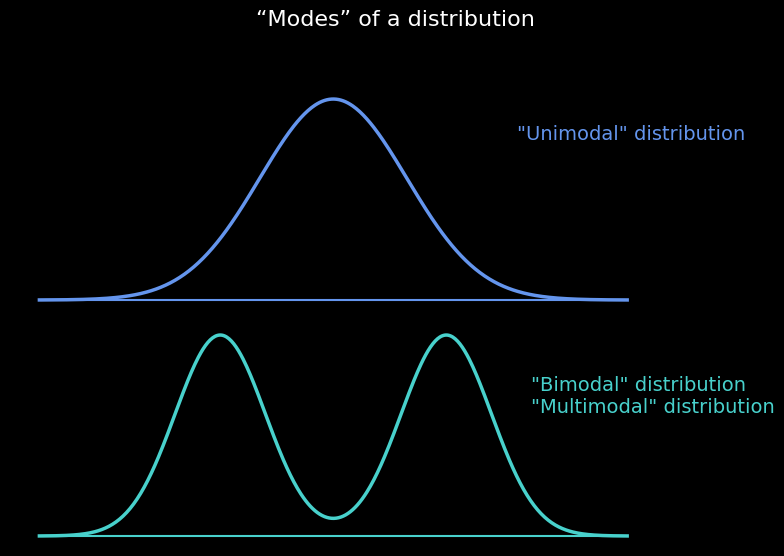

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # Gaussian PDF를 위해 사용

# 스타일 설정 (이미지와 유사하게)
plt.style.use('dark_background')
plt.rcParams['axes.edgecolor'] = 'none' # 축 테두리 없음
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['text.color'] = 'white'

# Figure 생성
fig, axs = plt.subplots(2, 1, figsize=(8, 6)) # 2개의 행, 1개의 열로 서브플롯 생성
fig.suptitle('“Modes” of a distribution', fontsize=16, y=0.95)

# 1. 단일 모드 (Unimodal) 분포
# 가우시안 분포를 사용하여 단일 피크 생성
mu1 = 0
sigma1 = 1
x1 = np.linspace(mu1 - 4*sigma1, mu1 + 4*sigma1, 500)
y1 = stats.norm.pdf(x1, mu1, sigma1)

axs[0].plot(x1, y1, color='cornflowerblue', linewidth=2.5)
axs[0].text(mu1 + 2.5, np.max(y1)*0.8, '"Unimodal" distribution',
            color='cornflowerblue', fontsize=14, ha='left')
axs[0].set_yticks([]) # y축 눈금 제거
axs[0].set_xticks([]) # x축 눈금 제거
# x축 기준선 추가 (이미지와 유사하게)
axs[0].axhline(0, color='cornflowerblue', xmin=0.05, xmax=0.95, linewidth=1.5)


# 2. 이중 모드 (Bimodal) 분포
# 두 개의 가우시안 분포를 혼합하여 이중 피크 생성
mu2a = -2
sigma2a = 0.8
mu2b = 2
sigma2b = 0.8
x2 = np.linspace(min(mu2a - 4*sigma2a, mu2b - 4*sigma2b),
                 max(mu2a + 4*sigma2a, mu2b + 4*sigma2b), 500)
y2a = stats.norm.pdf(x2, mu2a, sigma2a)
y2b = stats.norm.pdf(x2, mu2b, sigma2b)
y2 = y2a + y2b # 두 분포를 합침

axs[1].plot(x2, y2, color='mediumturquoise', linewidth=2.5)
axs[1].text(mu2b + 1.5, np.max(y2)*0.7, '"Bimodal" distribution\n"Multimodal" distribution',
            color='mediumturquoise', fontsize=14, ha='left', va='center')
axs[1].set_yticks([])
axs[1].set_xticks([])
# x축 기준선 추가
axs[1].axhline(0, color='mediumturquoise', xmin=0.05, xmax=0.95, linewidth=1.5)


# 레이아웃 조정
plt.tight_layout(rect=[0, 0.03, 1, 0.90]) # suptitle 및 subplot 간 간격 조절
plt.show()

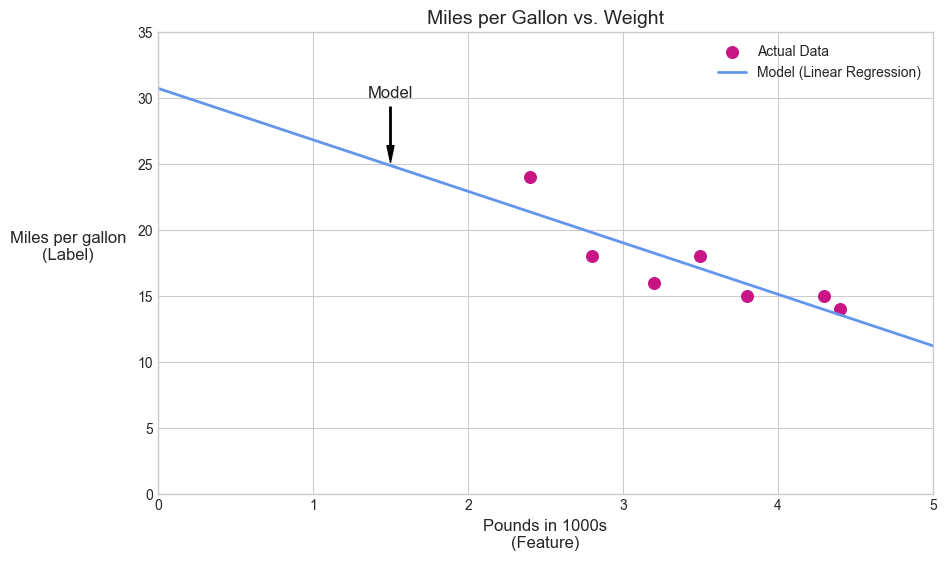

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 이미지와 유사한 데이터 생성 (실제 데이터로 교체 가능)
# 무게 (파운드 단위, 1000s) - 특성(X)
pounds_in_1000s = np.array([2.4, 2.8, 3.2, 3.5, 3.8, 4.3, 4.4]).reshape(-1, 1)
# 갤런당 마일 - 라벨(y)
miles_per_gallon = np.array([24, 18, 16, 18, 15, 15, 14])

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(pounds_in_1000s, miles_per_gallon)

# 예측을 위한 x값 범위 생성
x_fit = np.linspace(0, 5, 100).reshape(-1, 1)
# 모델을 사용하여 예측값 생성
y_fit = model.predict(x_fit)

# 그래프 시각화
plt.style.use('seaborn-v0_8-whitegrid') # 이미지와 유사한 스타일 적용
plt.figure(figsize=(10, 6))

# 실제 데이터 포인트 그리기
plt.scatter(pounds_in_1000s, miles_per_gallon, color='mediumvioletred', s=70, label='Actual Data')

# 학습된 모델 (회귀선) 그리기
plt.plot(x_fit, y_fit, color='cornflowerblue', linewidth=2, label='Model (Linear Regression)')

# 축 레이블 및 제목 설정
plt.xlabel('Pounds in 1000s\n(Feature)', fontsize=12)
plt.ylabel('Miles per gallon\n(Label)', fontsize=12, rotation=0, labelpad=50)
plt.title('Miles per Gallon vs. Weight', fontsize=14)

# y축 범위 설정 (이미지와 유사하게)
plt.ylim(0, 35)
plt.xlim(0, 5)

# 범례 표시
plt.legend(fontsize=10)

# 이미지의 "Model" 텍스트와 화살표 추가 (선택 사항)
plt.annotate('Model', xy=(1.5, model.predict(np.array([[1.5]]))[0]), xytext=(1.5, 30),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=12, ha='center')


plt.show()

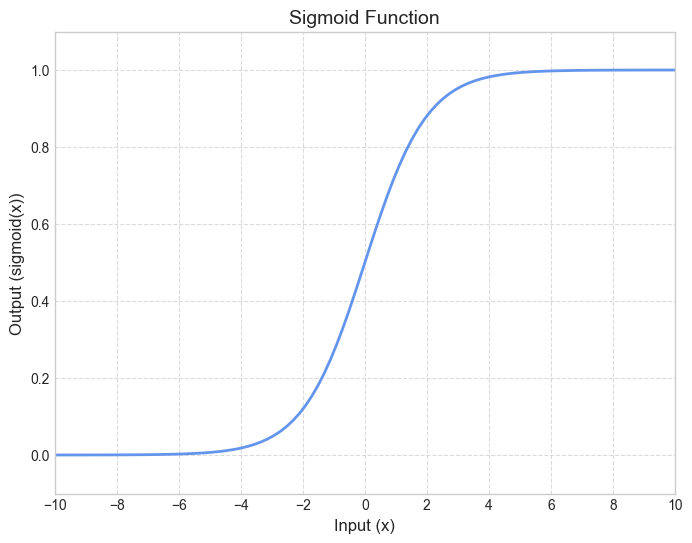

In [3]:

import numpy as np
import matplotlib.pyplot as plt
# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# x 값 생성
x = np.linspace(-10, 10, 100)
# 시그모이드 함수 적용
y = sigmoid(x)
# 그래프 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')  # 이미지와 유사한 스타일 적용
plt.figure(figsize=(8, 6))
# 시그모이드 함수 그래프 그리기
plt.plot(x, y, color='cornflowerblue', linewidth=2)
# 축 레이블 및 제목 설정
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output (sigmoid(x))', fontsize=12)
plt.title('Sigmoid Function', fontsize=14)
# y축 범위 설정
plt.ylim(-0.1, 1.1)
# x축 범위 설정
plt.xlim(-10, 10)
# y축 눈금 설정
plt.yticks(np.arange(0, 1.1, 0.2))
# x축 눈금 설정
plt.xticks(np.arange(-10, 11, 2))
# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)
# 그래프 표시
plt.show()
